<a href="https://colab.research.google.com/github/Varshith022006/STML-ASSIGNEMNTS-2025/blob/main/stmlprojectcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model:
Mean Squared Error: 3.96
Root Mean Squared Error: 1.99

Decision Tree Model:
Mean Squared Error: 123.77
Root Mean Squared Error: 11.13

Support Vector Machine (SVM) Model:
Mean Squared Error: 798.10
Root Mean Squared Error: 28.25


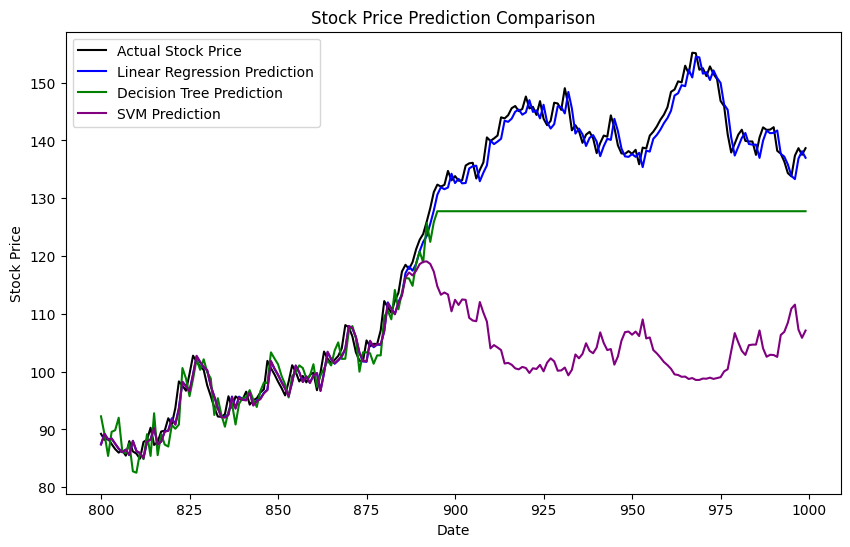


Conclusion:
From the comparison, we can conclude which model performed best based on RMSE and MSE values.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=1000, freq='B')
price_changes = np.random.randn(1000) * 2
prices = 100 + np.cumsum(price_changes)
data = pd.DataFrame({'Date': dates, 'Close': prices})
data['Prev_Close'] = data['Close'].shift(1)
data.dropna(inplace=True)
X = data[['Prev_Close']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print(f"Mean Squared Error: {mse:.2f}")
  print(f"Root Mean Squared Error: {rmse:.2f}")
  return y_pred
print("Linear Regression Model:")
lr_model = LinearRegression()
lr_pred = evaluate_model(lr_model, X_train, X_test, y_train, y_test)
print("\nDecision Tree Model:")
dt_model = DecisionTreeRegressor()
dt_pred = evaluate_model(dt_model, X_train, X_test, y_train, y_test)
print("\nSupport Vector Machine (SVM) Model:")
svm_model = SVR(kernel='rbf')
svm_pred = evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Stock Price", color='black')
plt.plot(y_test.index, lr_pred, label="Linear Regression Prediction", color='blue')
plt.plot(y_test.index, dt_pred, label="Decision Tree Prediction", color='green')
plt.plot(y_test.index, svm_pred, label="SVM Prediction", color='purple')
plt.legend()
plt.title("Stock Price Prediction Comparison")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()
print("\nConclusion:")
print("From the comparison, we can conclude which model performed best based on RMSE and MSE values.")